# ch01.04 DNN기초 - 이진분류 모델


---
* 날짜: 2022.06.28
* 이름: 윤태우

## 학습내용
    - 딥러닝을 이용한 이진분류 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 11장, 13장
* 데이터
  * `sornar.csv`
  * `pima-indians-diabetes.csv`


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 292 (delta 77), reused 43 (delta 43), pack-reused 178
Receiving objects: 100% (292/292), 21.99 MiB | 25.00 MiB/s, done.
Resolving deltas: 100% (112/112), done.


## 소나 데이터 광물 예측
---

> 1988년 존스홉킨스 대학교의 세즈노프스키(Sejnowski) 교수는 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터를 정리했습니다. 신경망이 광석과 돌을 얼마나 잘 구분하는지 알아보도록 합시다.

```
- 0~59 : 음파 탐지기를 이용해 얻은 값
- 60: 광석 구분 {R, M}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-01.PNG?raw=true width=450>
</p>




### | 데이터 준비

#### **데이터 로드**
* `sonar.csv`

In [79]:
path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
df = pd.read_csv(path)
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


#### **데이터 전처리**

In [89]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def data_load(path, seed=1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header=None, # 첫번째 행이 데이터(컬럼이 없음)
                   )
  # x-y 분할
  x = df.values[:, :-1] # 모든행(샘플), 0부터59까지 열(속성)
  y = df.values[:, -1] # 모든행(샘플), 60번째 열(속성)

  # 정규화 (x의 모든속성, y는 하지 않음)
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  
  # 라벨링 (y 라벨링, x는 하지 않음)
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)

  # train-test 데이터 분할
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, 
                                                      random_state=seed, 
                                                      stratify=y ) # train-test 분할 시 클래스 비율 비슷하게 유지
  return x_train, x_test, y_train, y_test

data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_valid, y_train, y_valid = path2data_sonar(data_path)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(145, 60) (63, 60) (145,) (63,)


* 예측값 분포 확인

Text(0.5, 1.0, 'validset')

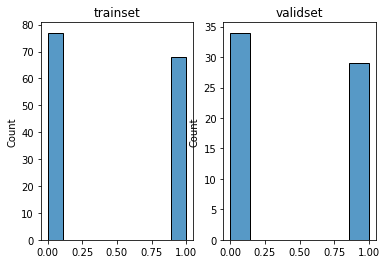

In [90]:
plt.subplot(121);sns.histplot(x=y_train);plt.title('trainset')
plt.subplot(122);sns.histplot(x=y_valid);plt.title('validset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-02.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [96]:
from tensorflow.keras import layers, models, utils

def build_model() :
  x = layers.Input(shape=(60)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(30, activation = 'relu')(x)
  y = layers.Dense(1, activation = 'sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정
  # 이진분류 문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수는 시그모이드 함수
  model = models.Model(x,y, name='house_regression')
  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "house_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


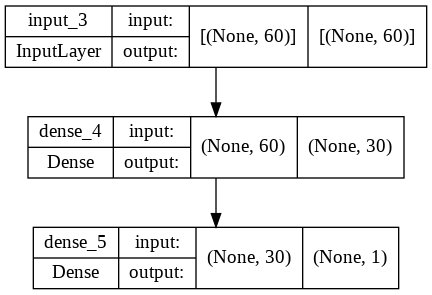

In [97]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 'binary_crossentropy'
* `optimizer` : adam
* `metrics`: accuracy 


In [98]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 (업데이트 한번에 사용될 샘플 개수)

In [99]:
model.fit(x_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.7145 - accuracy: 0.5793
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6690
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7379
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7862
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8483
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8552
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8552
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8759
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.9034
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.9103
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [101]:
model.evaluate(x_valid, y_valid)

2/2 [==============================] - 0s 13ms/step - loss: 0.4455 - accuracy: 0.8413


[0.4455161392688751, 0.841269850730896]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [103]:
y_pred = model.predict(x_valid)

* 예측 시각화

[[28  6]
 [ 4 25]]


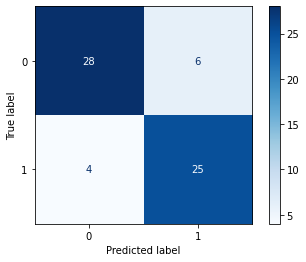

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 함수 인풋 배열은 정수가 되어야 한다.
cm = confusion_matrix(y_valid, np.round(y_pred))
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0에서 1 사이의 확률값
* 예측값의 shape : (샘플 개수, ) 혹은 (샘플 개수, 1)
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : sigmoid 
* 손실함수 (loss) : binary crossentropy
* 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 9.3156e-04 - accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 7.8198e-04 - accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 6.8425e-04 - accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 6.1310e-04 - accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 5.5630e-04 - accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 5.1731e-04 - accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 4.8374e-04 - accuracy: 1.0000
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 4.3416e-04 - accuracy: 1.0000
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 4.0757e-04 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss:

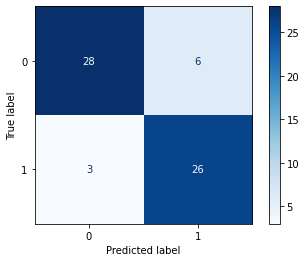

In [107]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def data_load(path, seed=1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header=None, # 첫번째 행이 데이터(컬럼이 없음)
                   )
  # x-y 분할
  x = df.values[:, :-1] # 모든행(샘플), 0부터59까지 열(속성)
  y = df.values[:, -1] # 모든행(샘플), 60번째 열(속성)

  # 정규화 (x의 모든속성, y는 하지 않음)
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  
  # 라벨링 (y 라벨링, x는 하지 않음)
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)

  # train-test 데이터 분할
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, 
                                                      random_state=seed, 
                                                      stratify=y ) # train-test 분할 시 클래스 비율 비슷하게 유지
  return x_train, x_test, y_train, y_test

data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_valid, y_train, y_valid = path2data_sonar(data_path)

from tensorflow.keras import layers, models, utils

def build_model(depth, width) :
  x = layers.Input(shape=(60)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(width, activation = 'relu')(x)
  for i in range(depth) :
    z = layers.Dense(width, activation = 'relu')(z)
  y = layers.Dense(1, activation = 'sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정
  # 이진분류 문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수는 시그모이드 함수
  model = models.Model(x,y, name='house_regression')
  return model

model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100, batch_size = 16)
y_pred = model.predict(x_valid)
print('-'*30, 'evaluate', '-'*30)
model.evaluate(x_valid, y_valid)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, np.round(y_pred))
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### | 과제 3. 피마 인디언 당뇨병 예측


* `pima-indians-diabetes.csv`
```
df = pd.read_csv(data_path,
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
```

In [114]:
df = pd.read_csv('/content/SkillTreePython-DeepLearning/dataset/pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
scaler = StandardScaler()
x = scaler.fit_transform(df.values[:,:-1])
y = df.values[:,-1]

X_train,X_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2, random_state = 1, stratify = y)
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(614, 8) (154, 8) (614,) (154,)


In [117]:
def build_model() :
  x = layers.Input(shape=(8))
  z = layers.Dense(16)(x)
  z = layers.Dense(16, activation = 'relu')(z)
  z = layers.Dense(8,activation = 'relu')(z)
  y = layers.Dense(1, activation = 'sigmoid')(z)
  model = models.Model(x,y,name='pima_diabetes')
  return model
model = build_model()

In [121]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train,y_train, epochs = 100, batch_size = 8)
print('-'*30, 'evaluate', '-'*30)
model.evaluate(X_valid, y_valid)
y_pred = model.predict(X_valid)

Epoch 1/100
77/77 [==============================] - 1s 2ms/step - loss: 0.6577 - accuracy: 0.6661
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.7492
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7638
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7769
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7834
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.7932
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.7915
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7866
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7948
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7866
Epoch 11/

### | 과제 4. 생각해보기

데이터가 불균형 할 때 딥러닝에서는 어떠한 방법을 써서 이를 해결 하나요? 


In [ ]:
'''
1. weight balancing
특정 피쳐에 가중치를 높게 설정하여 불균형을 조절한다.
예를 들어 2:8 비율의 피쳐 두개가 있다면, 2 비율인 피쳐에 6만큼의 가중치를 더 주어 균형을 맞추는 것이다.

2. over sampling or under sampling
over sampling은 불균형 데이터의 적은 샘플들을 반복 학습 시키는 것이다. 이는 가중치를 높이는 것과 비슷하다.
under sampling은 샘플 수가 많은 피쳐의 샘플 중 일부만을 선택하고, 불균형 데이터에서는 최대한 많은 샘플을 사용하는 방법이다. 이 때 Undersampling 된 데이터가 원본 데이터와 비교해 대표성이 있어야한다.
'''